In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn import metrics 
from sklearn import utils

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import matthews_corrcoef

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [46]:
data = pd.read_csv('/home/youho/cp/cleaned_data/cp_data_final_adasyn.csv')

In [47]:
# Designate categorical variables
data['sex'] = data.sex.astype('category')
data['dm'] = data.dm.astype('category')
data['htn'] = data.htn.astype('category')
data['smoke'] = data.smoke.astype('category')
data['gmfcs'] = data.gmfcs.astype('category')
data['cp_type'] = data.cp_type.astype('category')
data['dysphagia'] = data.dysphagia.astype('category')
data['low_bone_density'] = data.low_bone_density.astype('category')

In [48]:
print(data.dtypes)

Unnamed: 0                int64
age                     float64
sex                    category
dm                     category
htn                    category
height                  float64
weight                  float64
bmi                     float64
waist_circumference     float64
smoke                  category
gmfcs                  category
cp_type                category
dysphagia              category
bun                     float64
cr                      float64
gfr                     float64
chol                    float64
alp                     float64
got                     float64
gpt                     float64
tg                      float64
hdl                     float64
ldl                     float64
wbc                     float64
hb                      float64
plt                     float64
max_grip                float64
low_bone_density       category
dtype: object


In [49]:
data.shape

(121, 28)

In [50]:
data.head()

,Unnamed: 0,age,sex,dm,htn,height,weight,bmi,waist_circumference,smoke,...,got,gpt,tg,hdl,ldl,wbc,hb,plt,max_grip,low_bone_density
0,0,44.0,1.0,0.0,0.0,130.0,59.6,35.266272,91.0,1.0,...,64.0,46.0,250.0,31.0,52.0,5550.0,14.2,212.0,6.803880,1.0
1,1,38.0,1.0,0.0,0.0,172.0,47.6,16.089778,73.0,1.0,...,15.0,15.0,141.0,40.0,115.0,6770.0,14.3,230.0,18.370476,0.0
2,2,37.0,1.0,0.0,0.0,169.1,48.6,16.996091,63.5,0.0,...,28.0,16.0,92.0,56.0,87.0,5920.0,14.1,249.0,29.392762,0.0
3,3,33.0,1.0,0.0,0.0,173.0,55.0,18.376825,67.0,1.0,...,17.0,14.0,104.0,54.0,98.0,4700.0,16.1,273.0,20.411640,0.0
4,4,35.0,1.0,0.0,0.0,168.0,58.0,20.549887,74.5,1.0,...,26.0,23.0,446.0,35.0,61.0,6460.0,16.1,266.0,29.483480,0.0


In [51]:
feature_cols = ['gmfcs', 'waist_circumference', 'cp_type', 'gfr', 'max_grip']
target_cols = ['low_bone_density']

In [52]:
#split dataset in features and target variable

# X = data.iloc[:,:25] # Features
# y = data.iloc[:, 25:] # Target variable

X = data[feature_cols] # Features
y = data[target_cols] # Target variable

In [53]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# from matplotlib import pyplot

# X_resampled, y_resampled = SMOTE(random_state=0).fit_resample(X, y)

In [54]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=1) # 70% training and 30% test

Decision Trees
Accuracy: 0.8378378378378378
F1 score: 0.7272727272727272
AUROC: 0.8949999999999999
MCC: 0.6184009646551497
              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88        25
         1.0       0.80      0.67      0.73        12

    accuracy                           0.84        37
   macro avg       0.83      0.79      0.81        37
weighted avg       0.84      0.84      0.83        37



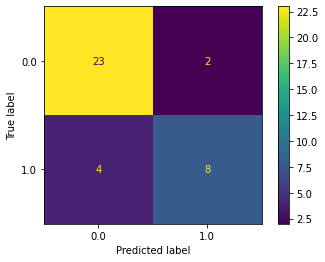

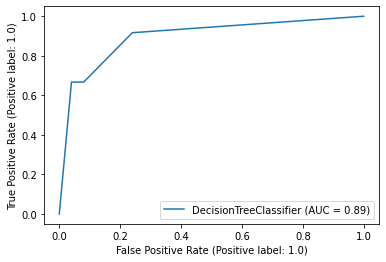

In [55]:
# Decision Tree Classifier
print("Decision Trees")

# Define and fit Decision Tree Classifier
DT_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
DT_clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = DT_clf.predict(X_test)

# calculate accuracy
print("Accuracy:",metrics.accuracy_score(y_test.values.ravel(), y_pred))

# calculate F1 score
f1 = metrics.f1_score(y_test.values.ravel(), y_pred)
print("F1 score:", f1)

# calculate AUROC
y_score = DT_clf.predict_proba(X_test)[:,1]
auroc = metrics.roc_auc_score(y_test.values.ravel(), y_score)
print("AUROC:", auroc)

# calculate Matthews Correlation Coefficient (MCC)
mcc = metrics.matthews_corrcoef(y_test.values.ravel(), y_pred)
print("MCC:", mcc)

# Classification Report
classification_report = metrics.classification_report(y_test.values.ravel(), y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')
print(classification_report)

# plot confusion matrix
DT_cm = metrics.plot_confusion_matrix(DT_clf, X_test, y_test.values.ravel())
plt.show(DT_cm)

# Plot ROC
ax = plt.gca()
DT_disp = plot_roc_curve(DT_clf, X_test, y_test.values.ravel(), ax=ax)
plt.show()

K Nearest Neighbors
Accuracy: 0.8378378378378378
F1 score: 0.7272727272727272
AUROC: 0.8716666666666666
MCC: 0.6184009646551497
              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88        25
         1.0       0.80      0.67      0.73        12

    accuracy                           0.84        37
   macro avg       0.83      0.79      0.81        37
weighted avg       0.84      0.84      0.83        37



/home/youho/.local/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


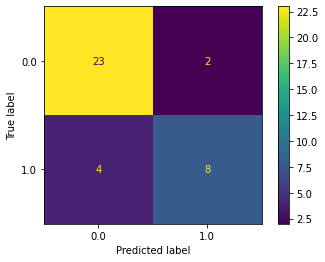

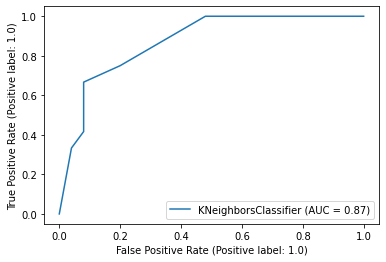

In [56]:
# K Nearest Neighbors
print("K Nearest Neighbors")

# Define and fit KNN Classifier
KNN_clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', leaf_size = 30)
KNN_clf.fit(X_train,y_train)

y_pred = KNN_clf.predict(X_test)

# calculate accuracy
print("Accuracy:",metrics.accuracy_score(y_test.values.ravel(), y_pred))

# calculate F1 score
f1 = metrics.f1_score(y_test.values.ravel(), y_pred)
print("F1 score:", f1)

# calculate AUROC
y_score = KNN_clf.predict_proba(X_test)[:,1]
auroc = metrics.roc_auc_score(y_test.values.ravel(), y_score)
print("AUROC:", auroc)

# calculate Matthews Correlation Coefficient (MCC)
mcc = metrics.matthews_corrcoef(y_test.values.ravel(), y_pred)
print("MCC:", mcc)

# Classification Report
classification_report = metrics.classification_report(y_test.values.ravel(), y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')
print(classification_report)

# plot confusion matrix
KNN_cm = metrics.plot_confusion_matrix(KNN_clf, X_test, y_test.values.ravel())
plt.show(KNN_cm)

# Plot ROC
ax = plt.gca()
KNN_disp = plot_roc_curve(KNN_clf, X_test, y_test.values.ravel(), ax=ax)
plt.show()

Naive Bayes
Cross validation score:  0.7606666666666666
Accuracy: 0.7567567567567568
F1 score: 0.6666666666666665
AUROC: 0.9099999999999999
MCC: 0.4862659205152521
              precision    recall  f1-score   support

         0.0       0.86      0.76      0.81        25
         1.0       0.60      0.75      0.67        12

    accuracy                           0.76        37
   macro avg       0.73      0.76      0.74        37
weighted avg       0.78      0.76      0.76        37



/home/youho/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


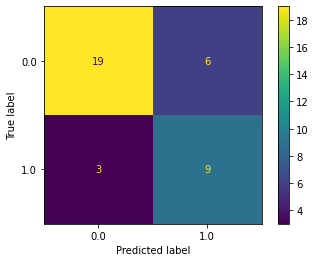

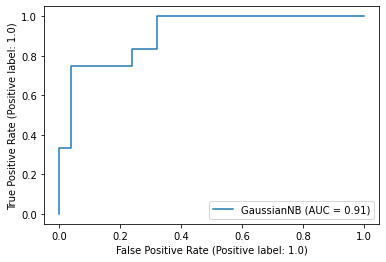

In [57]:
# Naive Bayes classification
kfold = model_selection.KFold(n_splits=5)

# Print Classifier name
print("Naive Bayes")

# Define and fit Naive Bayes Classifier
NB_clf = GaussianNB()
NB_clf.fit(X_train, y_train)
y_pred = NB_clf.predict(X_test)

# Cross Validation
results = model_selection.cross_val_score(NB_clf, X, y.values.ravel(), cv=kfold)
print("Cross validation score: ", results.mean())

NB_clf.fit(X_train, y_train.values.ravel())
y_pred = NB_clf.predict(X_test)

# calculate accuracy
print("Accuracy:",metrics.accuracy_score(y_test.values.ravel(), y_pred))

# calculate F1 score
f1 = metrics.f1_score(y_test.values.ravel(), y_pred)
print("F1 score:", f1)

# calculate AUROC
y_score = NB_clf.predict_proba(X_test)[:,1]
auroc = metrics.roc_auc_score(y_test.values.ravel(), y_score)
print("AUROC:", auroc)

# calculate Matthews Correlation Coefficient (MCC)
mcc = metrics.matthews_corrcoef(y_test.values.ravel(), y_pred)
print("MCC:", mcc)

# Classification Report
classification_report = metrics.classification_report(y_test.values.ravel(), y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')
print(classification_report)

# plot confusion matrix
NB_cm = metrics.plot_confusion_matrix(NB_clf, X_test, y_test.values.ravel())
plt.show(NB_cm)

# Plot ROC
ax = plt.gca()
NB_disp = plot_roc_curve(NB_clf, X_test, y_test.values.ravel(), ax=ax)
plt.show()

Random Forest
Cross validation score:  0.7593333333333334
Accuracy: 0.8648648648648649
F1 score: 0.7826086956521738
AUROC: 0.96
MCC: 0.6862026857089135
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90        25
         1.0       0.82      0.75      0.78        12

    accuracy                           0.86        37
   macro avg       0.85      0.83      0.84        37
weighted avg       0.86      0.86      0.86        37



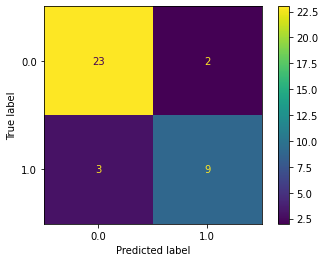

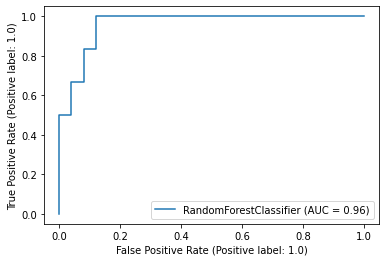

In [58]:
# Random Forest

kfold = model_selection.KFold(n_splits=5)

# Define  and fit Random Forest Classifier
RF_clf=RandomForestClassifier(n_estimators=5000)
RF_clf.fit(X_train, y_train.values.ravel())
y_pred=RF_clf.predict(X_test)

# Print Classifier name
print("Random Forest")

# Cross Validation
results = model_selection.cross_val_score(RF_clf, X, y.values.ravel(), cv=kfold)
print("Cross validation score: ", results.mean())

RF_clf.fit(X_train, y_train.values.ravel())
y_pred = RF_clf.predict(X_test)

# calculate accuracy
print("Accuracy:",metrics.accuracy_score(y_test.values.ravel(), y_pred))

# calculate F1 score
f1 = metrics.f1_score(y_test.values.ravel(), y_pred)
print("F1 score:", f1)

# calculate AUROC
y_score = RF_clf.predict_proba(X_test)[:,1]
auroc = metrics.roc_auc_score(y_test.values.ravel(), y_score)
print("AUROC:", auroc)

# calculate Matthews Correlation Coefficient (MCC)
mcc = metrics.matthews_corrcoef(y_test.values.ravel(), y_pred)
print("MCC:", mcc)

# Classification Report
classification_report = metrics.classification_report(y_test.values.ravel(), y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')
print(classification_report)

# plot confusion matrix
RF_cm = metrics.plot_confusion_matrix(RF_clf, X_test, y_test.values.ravel())
plt.show(RF_cm)

# Plot ROC
ax = plt.gca()
RF_disp = plot_roc_curve(RF_clf, X_test, y_test.values.ravel(), ax=ax)
plt.show()

Bagging
Cross validation score:  0.8099906629318393
Accuracy: 0.8378378378378378
F1 score: 0.7272727272727272
AUROC: 0.9483333333333334
MCC: 0.6184009646551497
              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88        25
         1.0       0.80      0.67      0.73        12

    accuracy                           0.84        37
   macro avg       0.83      0.79      0.81        37
weighted avg       0.84      0.84      0.83        37



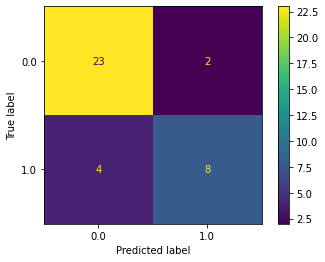

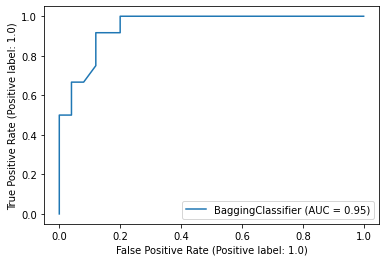

In [59]:
# Bagging Decision Trees 

kfold = model_selection.KFold(n_splits=7)
cart = DecisionTreeClassifier()
num_trees = 5000

# Define and fit Bagging Classifier
bagging_clf = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7)
bagging_clf.fit(X_train, y_train.values.ravel())
y_pred = bagging_clf.predict(X_test)

# Print Classifier name
print("Bagging")

# Cross Validation
results = model_selection.cross_val_score(bagging_clf, X, y.values.ravel(), cv=kfold)
print("Cross validation score: ", results.mean())

# calculate accuracy
print("Accuracy:",metrics.accuracy_score(y_test.values.ravel(), y_pred))

# calculate F1 score
f1 = metrics.f1_score(y_test.values.ravel(), y_pred)
print("F1 score:", f1)

# calculate AUROC
y_score = bagging_clf.predict_proba(X_test)[:,1]
auroc = metrics.roc_auc_score(y_test.values.ravel(), y_score)
print("AUROC:", auroc)

# calculate Matthews Correlation Coefficient (MCC)
mcc = metrics.matthews_corrcoef(y_test.values.ravel(), y_pred)
print("MCC:", mcc)

# Classification Report
classification_report = metrics.classification_report(y_test.values.ravel(), y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')
print(classification_report)

# plot confusion matrix
bagging_cm = metrics.plot_confusion_matrix(bagging_clf, X_test, y_test.values.ravel())
plt.show(bagging_cm)

# Plot ROC
ax = plt.gca()
bagging_disp = plot_roc_curve(bagging_clf, X_test, y_test.values.ravel(), ax=ax)
plt.show()

AdaBoost
Cross validation score:  0.7263333333333334
Accuracy: 0.8648648648648649
F1 score: 0.8
AUROC: 0.8866666666666667
MCC: 0.6994808819928564
              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90        25
         1.0       0.77      0.83      0.80        12

    accuracy                           0.86        37
   macro avg       0.84      0.86      0.85        37
weighted avg       0.87      0.86      0.87        37



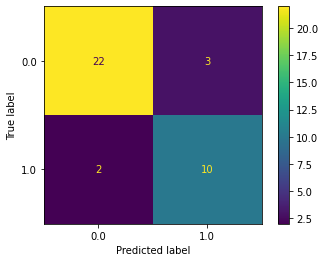

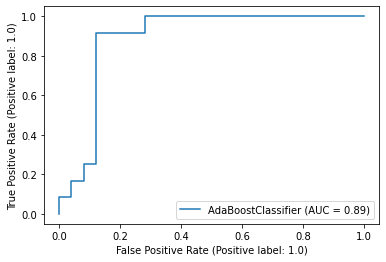

In [60]:
# AdaBoost Classification
seed = 7
num_trees = 350
kfold = model_selection.KFold(n_splits=5)

# Define and fit AdaBoost Classifier
ada_clf = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
ada_clf.fit(X_train, y_train.values.ravel())
y_pred = ada_clf.predict(X_test)

# Print Classifier name
print("AdaBoost")

# Cross Validation
results = model_selection.cross_val_score(ada_clf, X, y.values.ravel(), cv=kfold)
print("Cross validation score: ", results.mean())

# calculate accuracy
print("Accuracy:",metrics.accuracy_score(y_test.values.ravel(), y_pred))

# calculate F1 score
f1 = metrics.f1_score(y_test.values.ravel(), y_pred)
print("F1 score:", f1)

# calculate AUROC
y_score = ada_clf.predict_proba(X_test)[:,1]
auroc = metrics.roc_auc_score(y_test.values.ravel(), y_score)
print("AUROC:", auroc)

# calculate Matthews Correlation Coefficient (MCC)
mcc = metrics.matthews_corrcoef(y_test.values.ravel(), y_pred)
print("MCC:", mcc)

# Classification Report
classification_report = metrics.classification_report(y_test.values.ravel(), y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')
print(classification_report)

# plot confusion matrix
ada_cm = metrics.plot_confusion_matrix(ada_clf, X_test, y_test.values.ravel())
plt.show(ada_cm)

# Plot ROC
ax = plt.gca()
ada_disp = plot_roc_curve(ada_clf, X_test, y_test.values.ravel(), ax=ax)
plt.show()

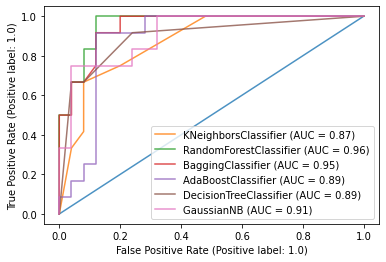

In [61]:
ax = plt.gca()

x = np.linspace(0, 1, 100)
y = x

plt.plot(x, y, alpha=0.8)

KNN_disp.plot(ax=ax, alpha=0.8)
RF_disp.plot(ax=ax, alpha=0.8)
bagging_disp.plot(ax=ax, alpha=0.8)
ada_disp.plot(ax=ax, alpha=0.8)
DT_disp.plot(ax=ax, alpha=0.8)
NB_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [21]:
# Voting Ensemble for Classification

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=5)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model

voting_clf = VotingClassifier(estimators, voting = 'soft')
voting_clf.fit(X_train, y_train)

# Print Classifier name
print("Voting Ensemble")

# calculate accuracy
print("Accuracy:",metrics.accuracy_score(y_test.values.ravel(), y_pred))

# calculate F1 score
f1 = metrics.f1_score(y_test.values.ravel(), y_pred)
print("F1 score:", f1)

# calculate AUROC
auroc = metrics.roc_auc_score(y_test.values.ravel(), y_pred)
print("AUROC:", auroc)

# Classification Report
classification_report = metrics.classification_report(y_test.values.ravel(), y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')
print(classification_report)

# plot confusion matrix
voting_cm = metrics.plot_confusion_matrix(voting_clf, X_test, y_test.values.ravel())
plt.show(voting_cm)

# Plot ROC
ax = plt.gca()
voting_disp = plot_roc_curve(voting_clf, X_test, y_test.values.ravel(), ax=ax)
plt.show()

Voting Ensemble
Accuracy: 0.9655172413793104
F1 score: 0.8571428571428571
AUROC: 0.875
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.75      0.86         4

    accuracy                           0.97        29
   macro avg       0.98      0.88      0.92        29
weighted avg       0.97      0.97      0.96        29



/home/youho/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AttributeError: predict_proba is not available when  probability=False

AUC: 0.7


In [229]:
clf_param_grid = {
    'n_estimators' : [10, 50],
    'max_depth' : [2, 3, 4, 5],
    }

In [231]:
clf_grid = GridSearchCV(clf, param_grid = clf_param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 1)
clf_grid.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=RandomForestClassifier(n_estimators=40), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5], 'n_estimators': [10, 50]},
             scoring='accuracy', verbose=1)

In [232]:
y_pred = clf_grid.predict(X_test)

In [20]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [21]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred)

# calculate precision-recall AUC
auc_score = metrics.auc(recall, precision)

print("AUROC:", auc_score)

AUC: 1.0


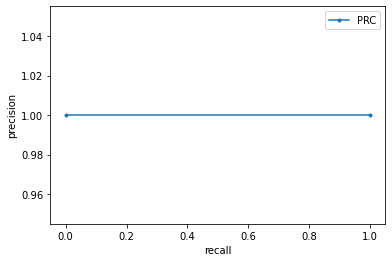

In [22]:
plt.plot(recall, precision, marker='.', label='PRC')

# axis labels
plt.xlabel('recall')
plt.ylabel('precision')
 
# show the legend
plt.legend()
 
# show the plot
plt.show()

In [237]:
# https://lsjsj92.tistory.com/542

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=RandomForestClassifier(n_estimators=10), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5], 'n_estimators': [10, 50]},
             scoring='accuracy', verbose=1)

Accuracy: 0.875
Precision: 1.0
Recall: 0.4


AUC: 0.7625


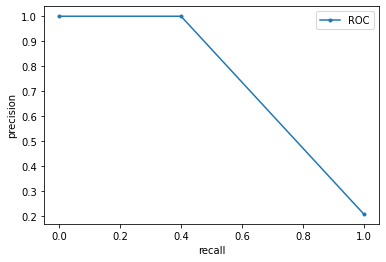